# PREPARE

## Importing needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

## Uploading the Dataset

In [2]:
file_path = "C:/Users/muazs/Desktop/train.xlsx"

data = pd.read_excel(file_path)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# PROCESS

## Exploring the Dataset

### Dataset Shape

In [3]:
data.shape

(891, 12)

### Dataset Numerical Description

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Dataset Textual Description

In [5]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Checking Dataset Attribtes Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking the Dataset for Duplicated Values

In [7]:
data.duplicated().sum()

0

## Checking the Dataset for Null Values

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Fixing Age

##### Getting the average Age for the categories 'Sex' and 'Pclass'

In [9]:
average_age = data.groupby(['Sex', 'Pclass'])['Age'].mean()
average_age

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

##### Filling nulls with the average based on each category

In [10]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average_age[row['Sex'], row['Pclass']]
    else:
        return row['Age']
    
data['Age'] = data.apply(fill_age, axis=1)

##### Checking Age nulls

In [11]:
data['Age'].isnull().sum()

0

#### Fixing Embarked

##### Filling nulls with the mode of Embarked

In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

##### Checking Embarked nulls

In [13]:
data['Embarked'].isnull().sum()

0

## Removing Irrelevant Attributes

### Removing Cabin since it have over 650+ nulls

In [14]:
data.drop('Cabin', axis=1, inplace=True)

### Removing Ticket

In [15]:
data.drop('Ticket', axis=1, inplace=True)

## Checking Noisy

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking Age

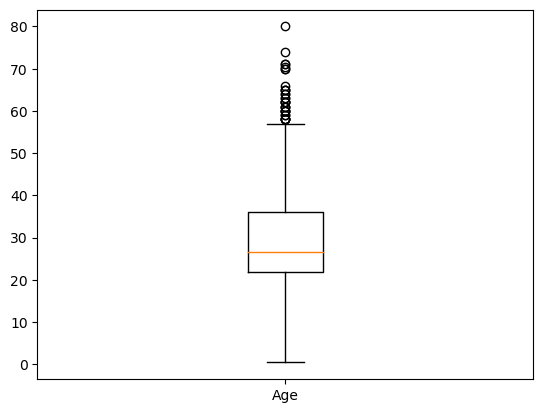

In [17]:
cols = ['Age']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

### Checking SibSp

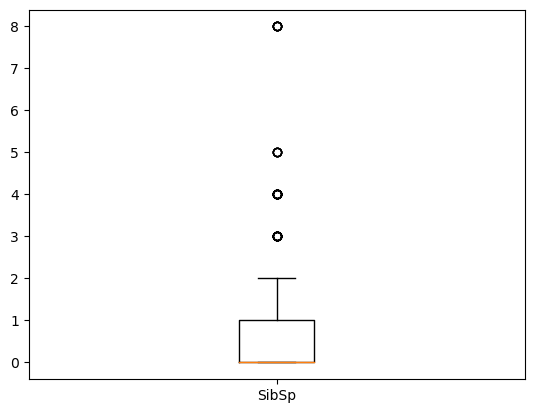

In [18]:
cols = ['SibSp']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

### Checking Parch

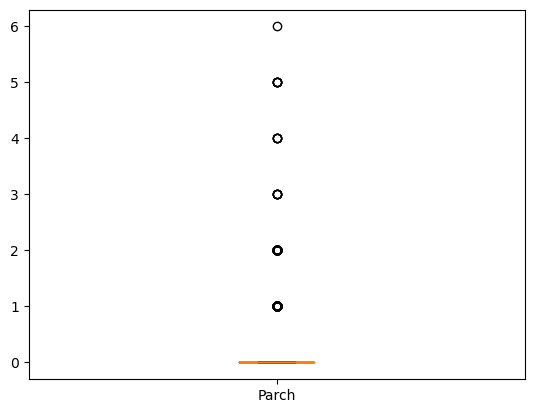

In [19]:
cols = ['Parch']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

### Checking Fare

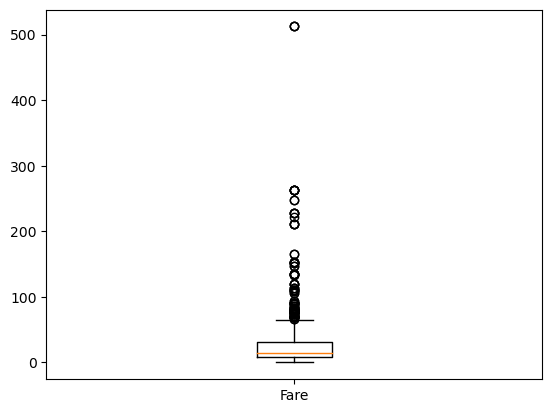

In [20]:
cols = ['Fare']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

Looks like there seems to be many outliers and need to be removed

#### Removing the Outlier in Fare

In [21]:
data = data[data['Fare'] <= 500]

#### Checking the Fare After Reomving the Outliers  

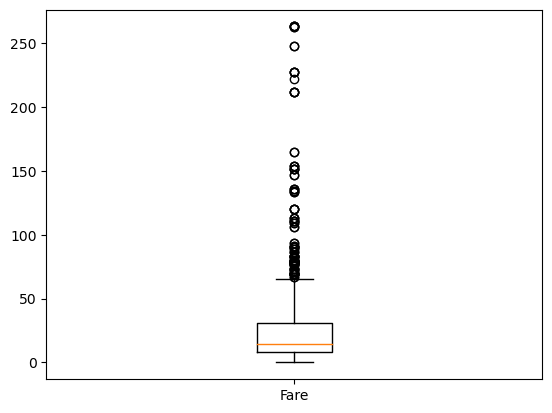

In [22]:
cols = ['Fare']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

In [23]:
data[['Fare']].describe()

,Fare
count,888.000000
mean,30.582164
std,41.176366
min,0.000000
25%,7.895800
50%,14.454200
75%,30.771850
max,263.000000


## Viewing the Dataset After Cleaning

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Creating a Copy for K-Means

In [25]:
dataK=data.copy(deep=True)

# ANALYZE

## Correlation

In [26]:
cor = data.corr()
cor.style.background_gradient(cmap='RdYlGn')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.006916,-0.033005,0.038995,-0.056929,-0.002223,-0.002046
Survived,-0.006916,1.000000,-0.334068,-0.069638,-0.033395,0.082157,0.261742
Pclass,-0.033005,-0.334068,1.000000,-0.406446,0.080937,0.018212,-0.604960
Age,0.038995,-0.069638,-0.406446,1.000000,-0.250770,-0.180851,0.125174
SibSp,-0.056929,-0.033395,0.080937,-0.250770,1.000000,0.415141,0.211816
Parch,-0.002223,0.082157,0.018212,-0.180851,0.415141,1.000000,0.263910
Fare,-0.002046,0.261742,-0.604960,0.125174,0.211816,0.263910,1.000000


## Enrichment

### Categorizing Age

In [27]:
data['AgeRounddown'] = np.floor(data['Age'])

In [28]:
bins = [-1, 4, 14, 24, 34, 44, 54, 64, 120]
labels = ['00-04', '05-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65+']

data['AgeCategory'] = pd.cut(data['AgeRounddown'], bins=bins, labels=labels)

data.drop(['Age', 'AgeRounddown'], axis=1, inplace=True)

In [29]:
print(data['AgeCategory'].value_counts())

25-34    315
15-24    242
35-44    138
45-54     73
00-04     40
05-14     38
55-64     31
65+       11
Name: AgeCategory, dtype: int64


In [30]:
data[['AgeCategory']].head()

,AgeCategory
0,15-24
1,35-44
2,25-34
3,35-44
4,35-44


### Counting Family Members

In [31]:
data['FamilyCount'] = data['SibSp'] + data['Parch'] + 1

In [32]:
print(data['FamilyCount'].value_counts())

1     535
2     160
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilyCount, dtype: int64


In [33]:
data[['FamilyCount']].head()

,FamilyCount
0,2
1,2
2,1
3,2
4,1


### Dividing by Alone, SibSp, ParCh, or SibSp & ParCh

In [34]:
def classify_passenger(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 'Alone'
    elif row['SibSp'] > 0 and row['Parch'] == 0:
        return 'SibSp'
    elif row['SibSp'] == 0 and row['Parch'] > 0:
        return 'ParCh'
    else:
        return 'SibSp & ParCh'

data['Gathering'] = data.apply(classify_passenger, axis=1)

data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [35]:
print(data['Gathering'].value_counts())

Alone            535
SibSp & ParCh    142
SibSp            141
ParCh             70
Name: Gathering, dtype: int64


In [36]:
data[['Gathering']].head()

,Gathering
0,SibSp
1,SibSp
2,Alone
3,SibSp
4,Alone


### Categorizing Fare

In [37]:
bins = [-1, 5, 10, 20, 30, 40, 50, 60, 1000]
labels = ['00-05', '05-10', '10-20', '20-30', '30-40', '40-50', '50-60','60+']

data['FareCategory'] = pd.cut(data['Fare'], bins=bins, labels=labels)

data.drop(['Fare'], axis=1, inplace=True)

In [38]:
print(data['FareCategory'].value_counts())

05-10    319
10-20    179
20-30    142
60+      119
30-40     58
50-60     38
00-05     17
40-50     16
Name: FareCategory, dtype: int64


In [39]:
data[['FareCategory']].head()

,FareCategory
0,05-10
1,60+
2,05-10
3,50-60
4,05-10


## Gathering Information

Assumptions:  
- Female survival rate are higher than men  
- Children survival rate are higher than adults  
- Class 1 survival rate are higher than the others  
- Alone travellers survival rate are lower than the others

### Sex VS Survival

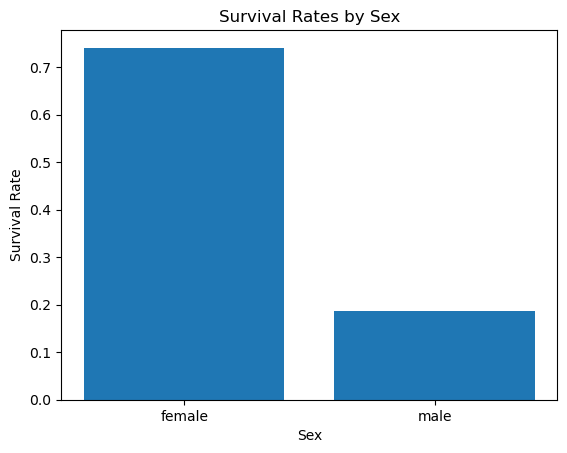

In [40]:
survival_rates = data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

plt.bar(survival_rates['Sex'], survival_rates['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Sex')
plt.show()

### Children VS Survival

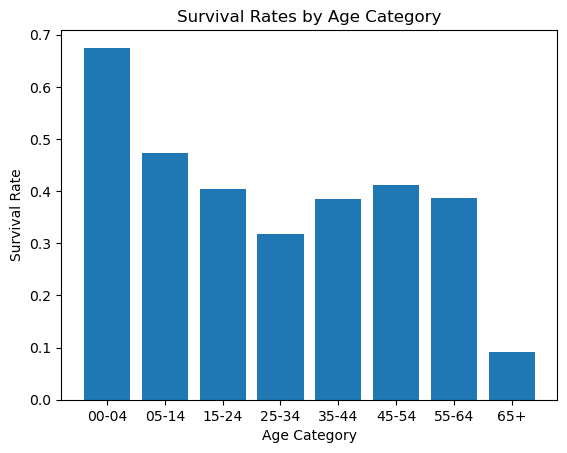

In [41]:
survival_rates = data[['AgeCategory', 'Survived']].groupby(['AgeCategory'], as_index=False).mean().sort_values(by='AgeCategory', ascending=True)

plt.bar(survival_rates['AgeCategory'], survival_rates['Survived'])
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Age Category')
plt.show()

### Pclass VS Survival

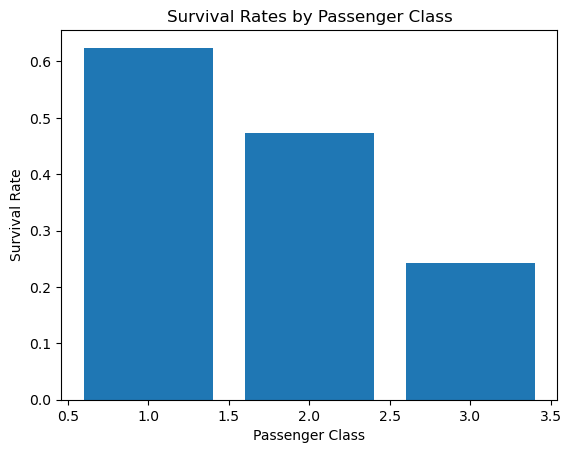

In [42]:
survival_rates = data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

plt.bar(survival_rates['Pclass'], survival_rates['Survived'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class')
plt.show()

### Gathering VS Survival

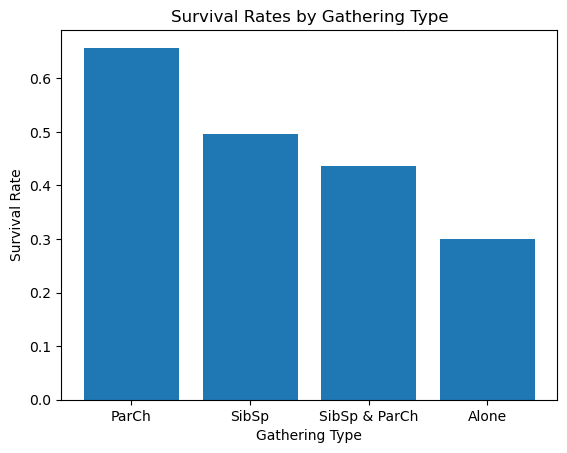

In [43]:
survival_rates = data[['Gathering', 'Survived']].groupby(['Gathering'], as_index=False).mean().sort_values(by='Survived', ascending=False)

plt.bar(survival_rates['Gathering'], survival_rates['Survived'])
plt.xlabel('Gathering Type')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Gathering Type')
plt.show()

## Organizing the Dataset for the 'Average Model' MZ

In [44]:
dataMZ = data.copy(deep=True)

In [45]:
dataMZ.head()

,PassengerId,Survived,Pclass,Name,Sex,Embarked,AgeCategory,FamilyCount,Gathering,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,S,15-24,2,SibSp,05-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,35-44,2,SibSp,60+
2,3,1,3,"Heikkinen, Miss. Laina",female,S,25-34,1,Alone,05-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,35-44,2,SibSp,50-60
4,5,0,3,"Allen, Mr. William Henry",male,S,35-44,1,Alone,05-10


### Scoring Age Categories

In [46]:
age_groups = dataMZ.groupby("AgeCategory")
age_scores = age_groups["Survived"].mean()

dataMZ["Age Score"] = dataMZ["AgeCategory"].map(age_scores)

### Scoring Pclass Categories

In [47]:
Pclass_groups = dataMZ.groupby("Pclass")
Pclass_scores = Pclass_groups["Survived"].mean()

dataMZ["Pclass Score"] = dataMZ["Pclass"].map(Pclass_scores)

### Scoring Sex Categories

In [48]:
Sex_groups = dataMZ.groupby("Sex")
Sex_scores = Sex_groups["Survived"].mean()

dataMZ["Sex Score"] = dataMZ["Sex"].map(Sex_scores)

### Scoring Gathering Categories

In [49]:
Gathering_groups = dataMZ.groupby("Gathering")
Gathering_scores = Gathering_groups["Survived"].mean()

dataMZ["Gathering Score"] = dataMZ["Gathering"].map(Gathering_scores)

### Getting Total Score

In [50]:
dataMZ["Total Score"] = dataMZ[["Age Score", "Sex Score", "Pclass Score", "Gathering Score"]].sum(axis=1)

### Categorizing Total Score

In [51]:
total_score_range = dataMZ["Total Score"].max() - dataMZ["Total Score"].min()
score_interval = total_score_range / 3

min_score = dataMZ["Total Score"].min()

def assign_score_category(score):
    if score >= min_score and score < min_score + score_interval:
        return "Low Survival"
    elif score >= min_score + score_interval and score < min_score + score_interval * 2:
        return "Mid Survival"
    elif score >= min_score + score_interval * 2 and score <= min_score + score_interval * 3:
        return "High Survival"
    else:
        return "Unknown"

dataMZ["Score Category"] = dataMZ["Total Score"].apply(assign_score_category)

### Uploading Dataset to Excel

In [52]:
#dataMZ.to_excel("Titanic_Cleaned.xlsx", index=False)

## Organizing the Dataset for the Models

### Creating a Copy from the Cleaned Dataset

In [53]:
dataM = data.copy(deep=True)

### Removing Irrelevant Attributes to the Model

In [54]:
dataM.drop(['Name'], axis=1, inplace=True)

### Encoding Sex

In [55]:
le_Sex = LabelEncoder()
dataM['Sex_n'] = le_Sex.fit_transform(dataM['Sex'])

e_sex = dataM.groupby('Sex')['Sex_n'].first()
e_sex

Sex
female    0
male      1
Name: Sex_n, dtype: int32

#### Removing Sex

In [56]:
dataM.drop(['Sex'], axis=1, inplace=True)

### Encoding Embarked

In [57]:
le_Embarked = LabelEncoder()
dataM['Embarked_n'] = le_Embarked.fit_transform(dataM['Embarked'])

e_embarked = dataM.groupby('Embarked')['Embarked_n'].first()
e_embarked

Embarked
C    0
Q    1
S    2
Name: Embarked_n, dtype: int32

#### Removing Embarked

In [58]:
dataM.drop(['Embarked'], axis=1, inplace=True)

### Encoding AgeCategory

In [59]:
le_AgeCategory = LabelEncoder()
dataM['AgeCategory_n'] = le_AgeCategory.fit_transform(dataM['AgeCategory'])

e_AgeCategory = dataM.groupby('AgeCategory')['AgeCategory_n'].first()
e_AgeCategory

AgeCategory
00-04    0
05-14    1
15-24    2
25-34    3
35-44    4
45-54    5
55-64    6
65+      7
Name: AgeCategory_n, dtype: int32

#### Removing AgeCategory

In [60]:
dataM.drop(['AgeCategory'], axis=1, inplace=True)

### Encoding Gathering

In [61]:
le_Gathering = LabelEncoder()
dataM['Gathering_n'] = le_AgeCategory.fit_transform(dataM['Gathering'])

e_Gathering = dataM.groupby('Gathering')['Gathering_n'].first()
e_Gathering

Gathering
Alone            0
ParCh            1
SibSp            2
SibSp & ParCh    3
Name: Gathering_n, dtype: int32

#### Removing Gathering

In [62]:
dataM.drop(['Gathering'], axis=1, inplace=True)

### Encoding FareCategory

In [63]:
le_FareCategory = LabelEncoder()
dataM['FareCategory_n'] = le_FareCategory.fit_transform(dataM['FareCategory'])

e_FareCategory = dataM.groupby('FareCategory')['FareCategory_n'].first()
e_FareCategory

FareCategory
00-05    0
05-10    1
10-20    2
20-30    3
30-40    4
40-50    5
50-60    6
60+      7
Name: FareCategory_n, dtype: int32

#### Removing FareCategory

In [64]:
dataM.drop(['FareCategory'], axis=1, inplace=True)

### Viewing dataM after Organzizing

In [65]:
dataM.head()

,PassengerId,Survived,Pclass,FamilyCount,Sex_n,Embarked_n,AgeCategory_n,Gathering_n,FareCategory_n
0,1,0,3,2,1,2,2,2,1
1,2,1,1,2,0,0,4,2,7
2,3,1,3,1,0,2,3,0,1
3,4,1,1,2,0,2,4,2,6
4,5,0,3,1,1,2,4,0,1


## Classifier Models

### Creating a Copy from the Model Prepared Dataset

In [66]:
dataZ = dataM.copy(deep=True)
dataZ.set_index('PassengerId', inplace=True)

### Features Variables 

In [67]:
feature_cols = ['Pclass', 'FamilyCount','Sex_n','AgeCategory_n','Gathering_n']
# ,'Embarked_n' , 'FareCategory_n'
X = dataZ[feature_cols] 
X

,Pclass,FamilyCount,Sex_n,AgeCategory_n,Gathering_n
PassengerId,,,,,
1,3,2,1,2,2
2,1,2,0,4,2
3,3,1,0,3,0
4,1,2,0,4,2
5,3,1,1,4,0
...,...,...,...,...,...
887,2,1,1,3,0
888,1,1,0,2,0
889,3,4,0,2,3


### Target Variable

In [68]:
y = dataZ['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 888, dtype: int64

### Splitting the Dataset to Testing and Training

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Models

#### Decision Tree

In [70]:
# Create Decision Tree classifer object
ModelDT = tree.DecisionTreeClassifier()

In [71]:
# Train Decision Tree classifier
ModelDT.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
# Ploting
#tree.plot_tree(ModelDT)

In [73]:
# Predict the response for test dataset
DTscore = ModelDT.score(X_test,y_test)
DTscore

0.7696629213483146

#### Naive Bayes

In [74]:
# Create a Naive Bayes classifier
modelNB= GaussianNB()

In [75]:
# Train Naive Bayes Classifier
modelNB.fit(X_train,y_train)

GaussianNB()

In [76]:
# Predict the response for test dataset
NBscore = modelNB.score(X_test,y_test)
NBscore

0.8033707865168539

#### KNN

In [77]:
# Create a KNN classifier
modelKN = KNeighborsClassifier(n_neighbors=5)

In [78]:
# Train KNN Classifier
modelKN.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
# Predict the response for test dataset
KNNscore = modelKN.score(X_test,y_test)
KNNscore

c:\Users\muazs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7808988764044944

### Comparing Models Scores

In [80]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'KNN'], #, 'K-Means'
    'Score': [DTscore, NBscore, KNNscore]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.803371
2,KNN,0.780899
0,Decision Tree,0.769663


### K-Means

In [81]:
dataK.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [82]:
# Select the Age and Fare columns for clustering
X = dataK[['Age','Fare','Pclass']].values

c:\Users\muazs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


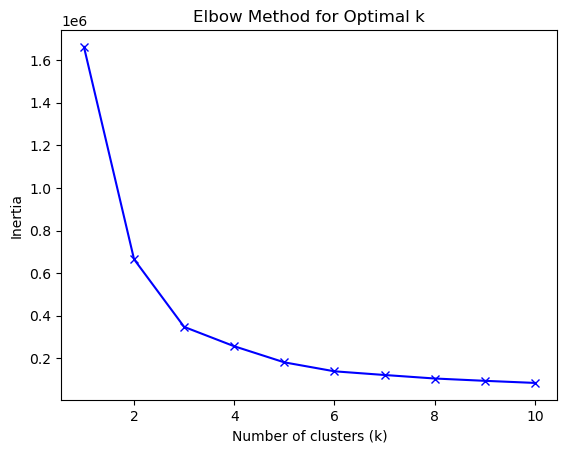

In [83]:
# Determine the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [84]:
# Instantiate the k-means algorithm
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

# Get the clusters for each data point
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_
# Add the labels to the original dataset
dataK['cluster'] = clusters

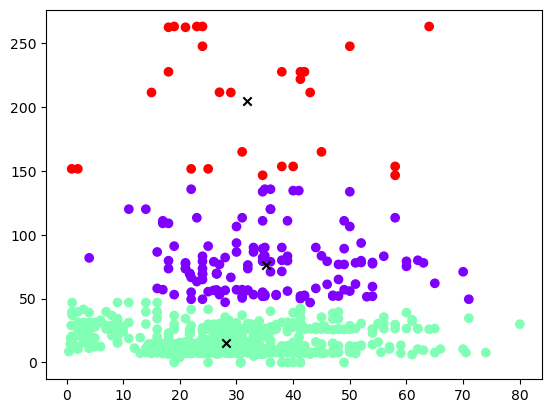

In [85]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')

plt.show()

In [86]:
print(clusters)
print(centroids)

[1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 2 1 2 1 1 1 1 1 2 0 0 1 0 0 2 1 1 1 1 1 1 2 0 1 1 1 1 0 0 1 1 1 0 1 1 2 1
 0 1 0 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 0 1 0 1 2 1 1 2 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 2 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 

# Thank You